# 분류모델 간단 정리

기존 데이터 어떤 레이블에 속하는지 패턴을 알고리즘으로 학습한 뒤, 새로운 데이터에 대한 레이블을 판별하는 것

## 분류 평가 지표

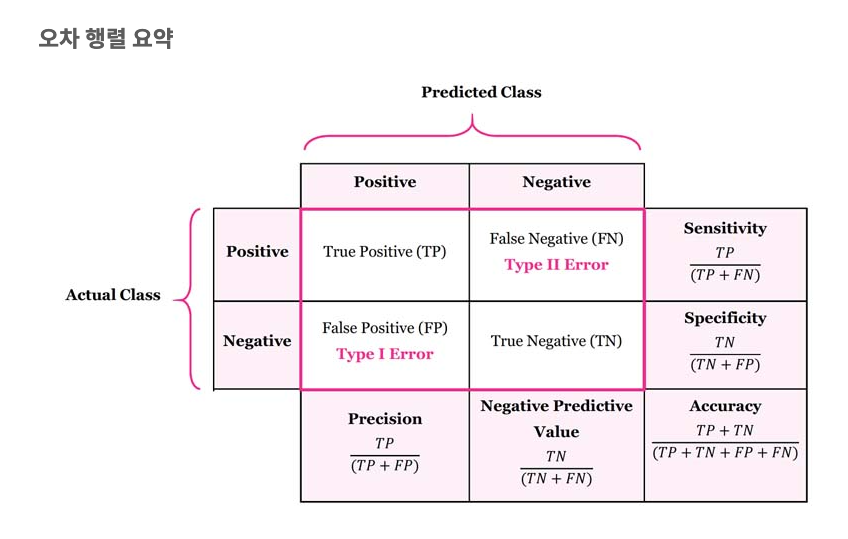

사진 출처 :https://koreapy.tistory.com/158

* 정확도: 실제 데이터가 예측 데이터와 얼마나 같은지를 판단하는 지표
* 정밀도: 예측을 positive로 한 대상 중 실제 positive로 로 일치한 데이터 비율
* 재현율: 실제 값이 positive인 대상 중 예측을 positive로 일치한 데이터 비율
* 정밀도/재현율의 트레이드오프: 재현율이 높아지면 정밀도는 낮아지고 재현율이 높아지면 정밀도는 높아짐
* F1스코어: 정밀도와 재현율을 이용한 지표- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값
* ROC곡선: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
* AUC: ROC곡선 아래의 면적

## 앙상블

여러 개의 분류기를 생성하고 그 예측 결과를 결합함으로써 보다 정확한 최종 예측 값 도출

* 보팅: 서로 다른 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
(하드보팅: 다수결의 법칙, 소프트보팅: 각 분류가 예측한 확률들을 평균- 일반적으로 더 우수)
* 배깅: 서로 같은 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
* 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하며 다음 분류기에(오분류된 데이터에) 가중치를 부여하면서 학습과 예측
* 스태킹: 여러 다른 모델의 예측 결과 값을 다시 학습 데이터로 만들어서 다른 모델로 재학습 후 예측

## Decision Tree

데이터에 있는 규칙을 학습을 통해 찾아내 트리(Tree)기반의 분류 규칙을 만드는 알고리즘

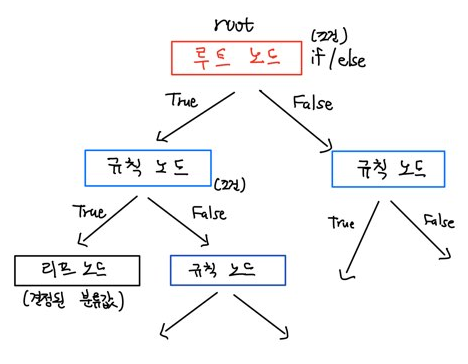

사진 출처 : https://blog.naver.com/teorw272/222082729148

* 루트 노드 : 결정 트리에서 최상위 노드
* 규칙 노드 : 규칙 조건이 표시된 노드
* 리프 노드 : 결정된 클래스 값이 표시된 노드
* 서브 트리 : 새로운 규칙 조건마다 생성된 트리

-> 많은 규칙은 트리를 복잡하게 만들어 과적합 발생하여 예측 성능 저하 -> 노드 분할 시 최대한 많은 데이터가 포함될 수 있는 규칙이 정해져야 함 -> 최대한 균일한 데이터셋 구성

##### 장점
* 정보의 균일도 기반으로 쉽고 직관적
* 일반적으로 스케일링, 정규화 불필요
* 시각화 가능
* 앙상블에서의 장점

##### 단점
* 트리 깊이가 깊어지면 과적합 발생
* 한 번에 한 가지 변수만 고려해 변수간 상호작용 파악 어려움

균일도:  데이터 셋 안의 데이터 정보가 들쭉날쭉 하지 않고 일정하게 구성되어 있는 정도
* 데이터를 구분하는 데 필요한 정보의 양에 영향을 줌
* 규칙노드는 정보 균일도가 높은 데이터셋을 먼저 선택할 수 있도록 규칙 조건을 만듦

균일도 측정방법
* 엔트로피 지수: 주어진 데이터 집합의 혼잡도
* 정보 이득 지수: 1- 엔트로피 지수, 정보 이득 지수가 높은 속성 기준으로 분할
* 지니 계수: 0이 평등, 1 불평등, 지니 계수가 낮은 속성을 기준으로 분할

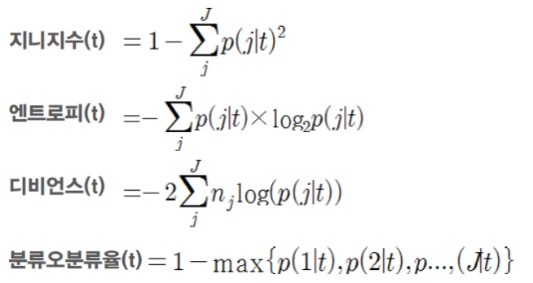

사진 출처: http://www.jangun.com/study/DataMining.html

결정트리 파라미터
* min_samples_split: 노드 분할을 위한 최소 샘플 데이터 수(2가 디폴트)
* min_samples_leaf : 리프 노드의 최소한 샘플 데이터 수 (1이 디폴트)
* max_dept: 트리의 최대 깊이 규정 (none 디폴트)
* max_leaf_nodes: 리프 노드의 최대 개수
* max_features: 최적의 분할을 위한 최대 피처 개수(none 디폴트 - 모든피처 사용)

## Random Forest

부트스트랩: 주어진 데이터가 모집단을 대표하는 독립 표본이라 가정하고, 그 자료로부터 중복을 허용한 무작위 추출을 하는 기법

배깅: 부트스트랩(bootstrap)+ 결합(aggregating)의 약자
* 배깅의 대표적인 알고리즘: 랜덤 포레스트

Random Forest: 부트스트랩 샘플로 만든 다수의 결정 트리들로 분류 결과를 취합해서 예측하는 앙상블 모델

다수의 결정트리가 모여 랜덤 포레스트 구성, 설명변수도 무작위로 선택

##### 장점
* 앙상블 알고리즘 중 비교적 빠른 수행 속도
* 기본 결정트리보다 일반화
* 시각화 가능

##### 단점
* 하이퍼 파라미터 많음
* 튜닝 시 오랜 시간

배깅 VS Random Forest: 배깅은 모든 피처 사용, 랜덤포레스트는 임의로 선정한 개수 고려

## ---- 부스팅의 기본 알고리즘: AdaBoost, AdaBoost에서 발전: GradientBoost, GBM에서 발전: XGBoost, LightGBM, CatBoost, NGBoost 등 ----

## AdaBoost

Tree가 아닌 Stump로 이루어져 있는 부스팅 기법
* Stump: 하나의 루트 노드에 두개의 리프노드를 가진 형태의 트리

Random Forest VS AdaBoost

* Random Forest: 여러 개의 트리 모델, 트리마다 동일한 가중치
* AdaBoost: 여러개의 stump모델, stump마다 다른 가중치, 순차적으로 stump 생성

### 작동원리
1. 입력변수 개수만큼 Stump 생성 - 분할은 decision tree 분리 기준에 따라 
2. Stump마다 지니 계수 구하기
3. Gini impurity가 가장 작은 Stump를 첫 Stump로 선정
4. Total Error & Amount of say 구하기
5. Amount of say를 이용해 가중치 업데이트 ( new sample weight = sample weight *e^amount of say)
6. 가중치를 다 더했을 때 1이 되도록 정규화 시키기
7. 업데이트 된 가중치를 이용해 새로운 데이터셋 생성
8. 생성된 새로운 데이터셋으로 앞의 과정 반복

* Total Error: 오분류된 데이터들의 sample weight총 합 (오분류된 데이터 수/ 전체 데이터 수)
* Amount of say: 해당 stump가 최종 분류에 있어서 얼마나 영향을 주는지를 수치화한 값

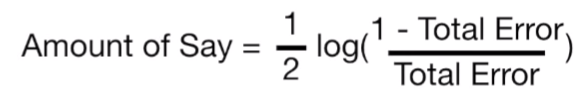

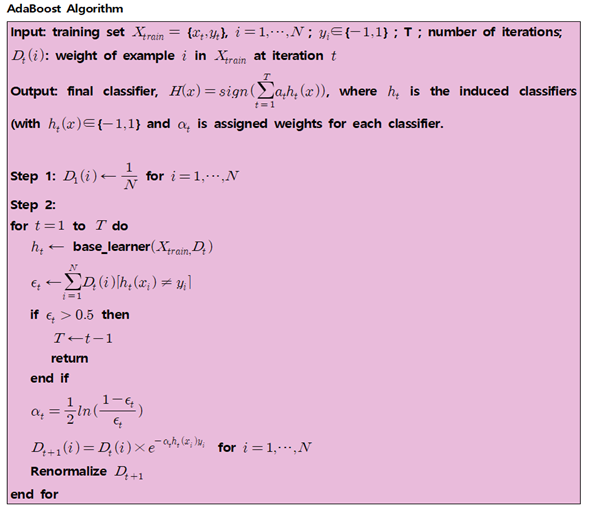

사진 출처: https://blog.naver.com/ollehw/222095641928

오분류된 데이터에 더욱 집중한 데이터셋으로 학습을 반복하면서 오류를 줄여나감

## GradientBoost(GBM)

Single leaf로 된 모델을 시작으로, 경사하강법을 활용해 오류를 줄여 나가는 부스팅 기법
* 경사하강법: Loss Function를 최소화하기 위해, 그 함수의 미분값이 최솟값이 되도록 반복적으로 학습하는 알고리즘

GradientBoost에서 Loss Function의 Default는 잔차(residual)-> 잔차가 최소가 되도록 학습하는 알고리즘

### 작동원리
1. Leaf Node 생성 후 잔차 계산
2. 잔차를 반영한 트리 생성
3. 학습률을 설정한 후 타겟 값 예측
4. 새로운 잔차 구하기
5. 잔차를 줄여가는 앞의 과정 반복

* 일반적으로 첫 leaf node는 타겟의 평균값 사용
* 학습률은 파라미터로 조절 가능 (학습률: 0~1, 모델의 과적합을 해결하기 위해 잔차에 곱해주는 것. 디폴트는 0.1)
* 학습률이 작으면 예측 성능은 좋아지지만 성능 느려짐, 학습률 크면 속도는 빨라지지만 예측 성능 떨어짐

도움되는 강의
1. https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=54
2. https://www.youtube.com/watch?v=2xudPOBz-vs
3. https://www.youtube.com/watch?v=jxuNLH5dXCs
4. https://www.youtube.com/watch?v=StWY5QWMXCw

잔차를 줄여가면서 오류를 수정하는 학습 과정을 반복

GBM 파라미터
* learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률 (디폴트 0.1)
* loss: 경사 하강법에서 사용할 Loss Function을 지정 (디폴트 잔차)
* subsample: 학습기에서 사용하는 데이터 샘플링의 비융 (디폴트 1: 학습데이터100%)
* n_estimator: 트리의 개수 (디폴트 100), learning_rate과 trdae-off관계로 상호 보완 필요

## XGBoost

GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간 및 과적합 규제의 부재 등을 해결한 트리 기반 앙상블 기법

##### 장점
* 분류와 회귀 영역에서 뛰어난 예측 성능
* 병렬 CPU 환경에서 학습이 가능함으로 GBM대비 빠른 학습
* XGBoost 자체에 과적합 규제 기능 포함
* max_depth 외에도 tree pruning을 통해 가지치기 가능
* 반복 수행시마다 교차 검증 수행
* 결손값 자체 처리 및 조기중단 기능 포함

### 작동원리
1. Single leaf 모델 생성
2. Single leaf 모델 예측 값과의 잔차 계산
3. 잔차값으로 노드별 Similarity score 구하기
4. Gain값 구하고 가장 큰 Gain값을 갖는 지표로 Root Node 분기
5. 노드 분기 과정 반복 & 가지치기
6. 가지치기가 끝난 Tree의 각 leaf의 output value계산
7. 초기 예측값, 학습률, output value 이용해 최종 예측
8. 1~7번 반복하여 Decision tree 완성

* Gain: 자식노드 similarity- 부모노드 similarity

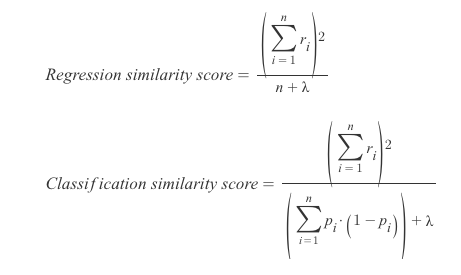

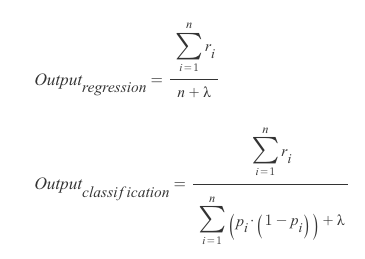

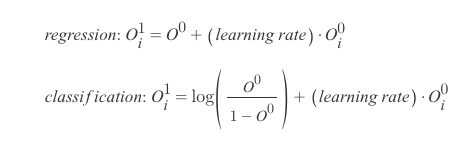

## LightGBM

XGBoost 보다 학습 시간과 메모리 사용량이 적지만 성능은 비슷- XGBoost의 한계가 보완되면서 탄생(Leaf-wise, EFB, GOSS 추가)

* Leaf-wise tree Growth: loss 변화가 가장 큰 node를 지속적으로 비대칭 분할(최대손실 변화 값을 가지는 리프 노드 분할 -> 깊은 비대칭 트리 생성 -> 동일한 leaf를 생성할 때 level-wise보다 예측 오류 손실 감소)
* 일반 GBM 은 level-wise tree growth사용(Root node와 가까운 node를 우선적으로 대칭 분할)- 과적합에 강함 -> LightGBM은 적은 데이터셋에서 과적합 가능

* EFB: Sparse data 공간에서 상호 배타적인 feature들을 하나의 feature로 묶어 훈련속도를 높이는 기법
* sparse data: 차원/전체 공간에 비해 데이터가 있는 공간이 매우 희소한 데이터 <-> dense data


* spare data -> Dense data
1. 0이 아닌 value를 갖는 데이터 쌍의 개수 파악
2. Greedy Algorithm을 통해 bundling

* GOSS : Gradient가 큰 데이터들은 그대로 유지하면서 Gradient가 작은 데이터에서는 랜덤 샘플링 하는 기법
* GBM 기반 모델에서 Gradient가 작으면 학습이 잘 되어 오차가 작다는 뜻, 크면 모델 학습이 잘 안된 것

##### 장점
* XGBoost 대비 더 빠른 예측, 성능은 비슷
* XGBoost 대비 더 적은 메모리 사용
* 범주형 변수의 자동 변환과 최적 분할(원핫인코딩 필요 없이)

도움되는 사이트 : https://greeksharifa.github.io/machine_learning/2019/12/09/Light-GBM/

## CatBoost

Categorical + Boosting -> 범주형 변수 처리에 뛰어난 성능 트리기반 앙상블 기법

##### GBM 알고라즘 주요 문제
* prediction shift: train 데이터의 target값에 의존하여 잔차를 구하고 학습하기 때문에, 범주형 변수가 train/test 서로 다른 확률 분포
* target leakage: 범주형을 수치형으로 변환할 때 학습 데이터 target에 대한 정보가 입력 변수를 설명하는데 포함되어, 예측 시점에서는 target의 정보를 알 수 없을 때 발생

catboost
* prediction shift -> ordered boosting
* target leakage -> ordered target encoding

#### 특징
* ordered boosting: 해당 시점 이전의 모든 data point를 활용한 잔차 계산 후 모델 생성
* ordered target encoding: 범주형 변수를 수치형으로 인코딩 시키는 방법- 이전 data의 target을 활용하여 encoding함으로써 data leakage가 일어나는 것 방지
* categorical reature combinations: 두 개의 feature를 하나의 feature로 묶는 방법-> feature selection에 대한 부담 줄일 수 있음

##### 장점
* 높은 예측 성능
* 과적합 감소
* 범주형 범수 자동으로 전처리
* 모델 튜닝& 파라미터 튜닝 간소화

##### 단점
* sparse한 matrix 처리하지 못함
* 데이터 대부분이 수치형인 경우, lightGBM보다 학습시간 느림

## Logistic Regression

선형 회귀 방식을 분류에 적용한 모델(선형회귀의 개념을 종속변수가 범주형인 경우로 확장)

* 시그모이드 함수를 이용해 분류 (y는 0과 1사이 값 반환)

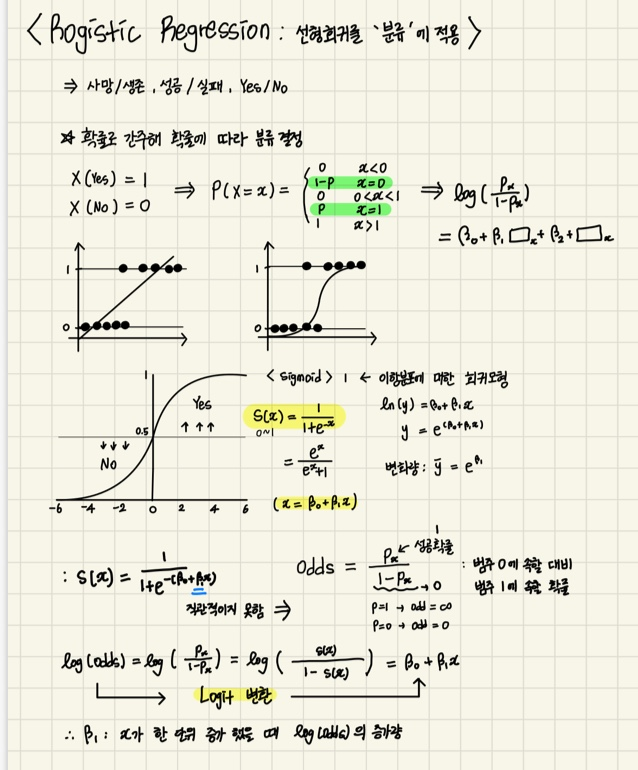

## NaiveBayes

데이터가 각 클래스에 속할 확률을 계산하는 조건부 확률 기반 분류 방법 (베이즈 정리 기반)
* Naive: 순수한 - 예측변수들 간에 서로 독립이라는 가정하에 확률 계산
* 베이즈 정리 (Bayes's Theorem) : 사전확률을 알고 있을 때 새로운 정보에 의한 사후확률을 예측하는 법

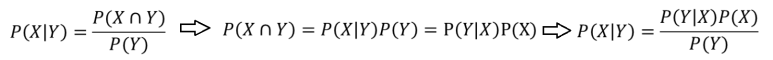

##### 장점
* 계산이 간단하고 빠르고 효율적
* 노이즈와 누락 데이터 잘 처리
* 큰 데이터 셋에 적합하지만 작은 데이터셋에도 가능

##### 단점
* 예측변수들끼리 독립이라는 가정 필요
* 수치형 변수가 많으면 부적절

Laplace Smoothing
* 학습에 사용된 데이터가 아닌 값이나 이상값이 들어가면 해당 데이터에 대한 확률은 0이 되는 문제 - 아무리 그 전에 의미 있는 확률 값이 도출된다 하더라도 0이 곱해지면 결과는 0이 되는 문제점-> 실제로 관찰한 것보다 한번씩 더 봤다고 가정 하는 것 (상수가 1인 경우)

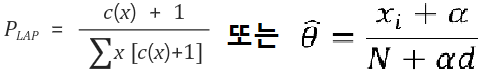

N : 전체 데이터 갯수, xi : i가 나온 횟수, α : 스무딩 파라미터, d : 전체 경우의 수

- exp와 log를 사용하여 확률을 계속 곱하면 수치가 너무 작아지는 underflow 문제를 해결
- Model Averaged Naive Bayes : 모든 가능한 피쳐조합의 확률을 평균해서 적용-> 피쳐가 네 개이면 피쳐를 한개씩, 두개씩, 세개씩, 네개씩 묶은 경우의 수 각각에 대해 확률 계산
- Attribute Weighting Naive Bayes : 조건부 확률에 가중치를 부여하여 계산

##### 종류
* Bernoulli naive bayes: 베르누이 분포를 따르는 나이브 베이즈 모델 (0/1 binary)
* Multinomial naive bayes: 다한 분포를 따르는 나이브 베이즈 모델 (횟수/빈도)
* Gaussian naive bayes: 정규분포를 따르는 나이브 베이즈 모델(continuous)

## SVM

분류를 위한 최적의 기준(Decision Boundary)을 정의하는 모델
- 오류를 최소화 하려는 목적을 가진 기존의 분류 방법에서 더 나아가 데이터와 분휴 기준 사이에 존재하는 여백을 최대화 하려는 목적으로 설계

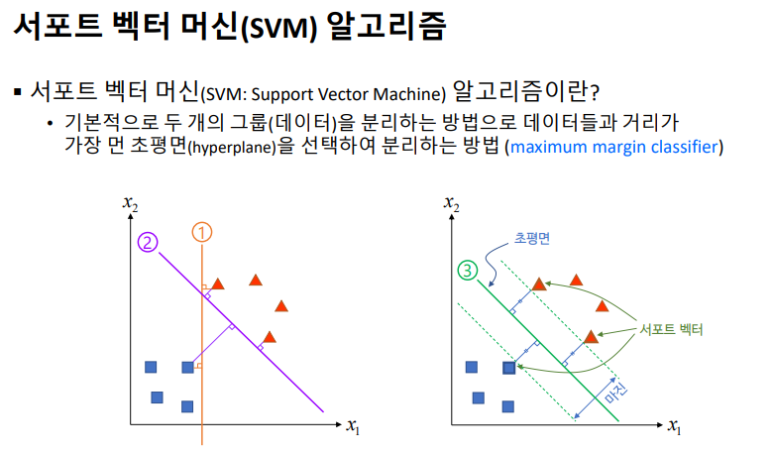

* Hard Margin: 마진 좁게- 과적합 가능성
* Soft Margin: 마진 넓게- 과소적합 가능성

-> 과대/과소 적합이 일어나지 않으면서 margin 최대화하기 위해서는 경계에 가까운 데이터, outlierdp eogks eocj wnddy (C파라미터로 조절 가능, C가 클수록 hard margin)

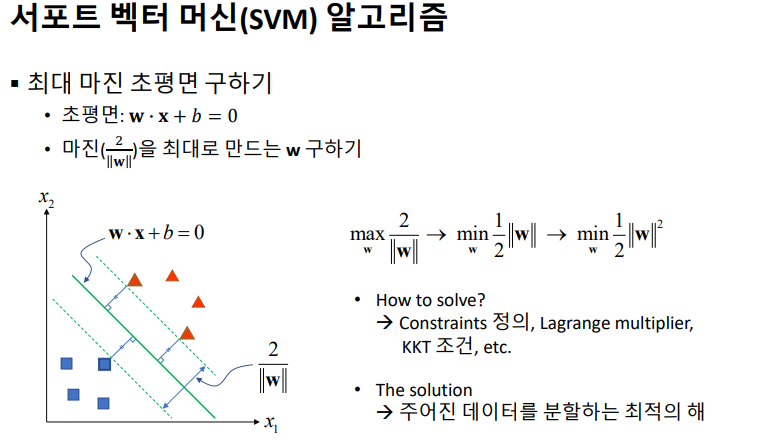

사진 출처: https://blog.naver.com/engineerjkk/222264279774

### 비선형 데이터 분류
1. 선형 svm에 직접 특성을 추가 - 다항특성(지수승/거듭제곱) 추가
2. kernel trick을 이용한 kernel SVM 사용 - 각 데이터가 특정 랜드마크(특정 데이터)와 얼마나 닮았는지 유사도 함수로 계산한 특성을 추가하는 것

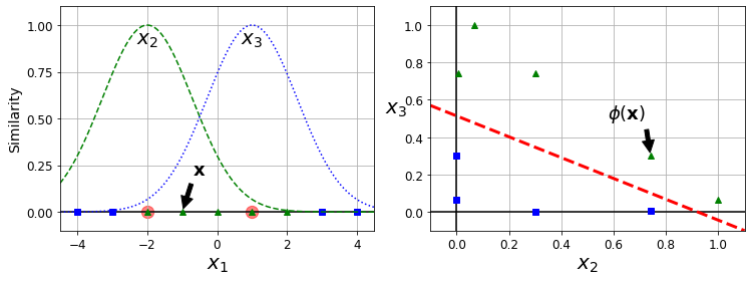

x : 샘플의 기존 특성 --> Ø(x) : 유사도 함수로 계산한 새로운 특성

### Kernel Trick
* 선형으로 분류되지 않는 데이터들을 분류하기 위해 실제로 데이터를 고차원으로 보내지 않지만 보내는 것과 동일한 효과를 줘서 매우 빠른 속도로 결정 경계선을 찾는 방법

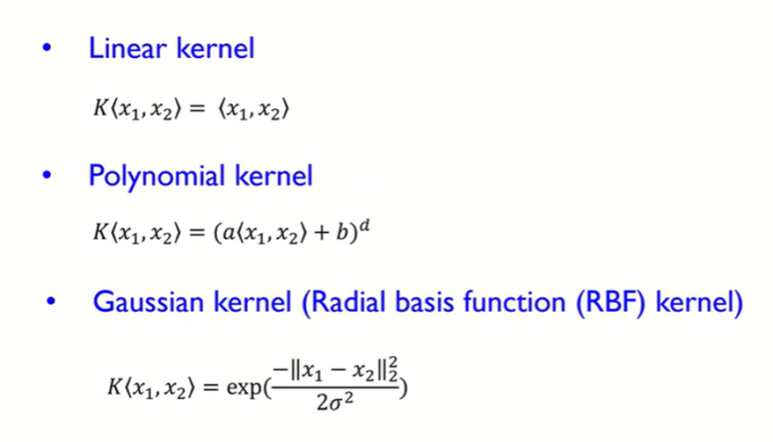

사진 출처: https://blog.naver.com/jjy1715/222132734960

## KNN(K-최근접 이웃)

K개의 가장 가까운 데이터를 이웃으로 찾아 예측에 사용하는 알고리즘

** 중요 매개변수
1. 데이터 사이의 거리를 재는 방법
2. 이웃의 수

분류: K개의 이웃에서 더 높은 확률에 해당되는 값으로 예측

회귀: K개의 이웃 값을 평균하여 예측

##### 장점
* 이상치에 영향을 덜 받음
* 하이퍼 파라미터 k 조정 만으로도 괜찮은 성능
* 간단하고 효율적, 훈련 빠름

##### 단점
* 고차원 데이터에는 적합하지 않아 차원 축소 필요
* k가 너무 크면 과적합, 너무 작으면 과소적합 발생 -> 적절한 K값 찾는 것이 중요

### 거리 척도
* 거리기반 모델의 경우 변수의 분포가 다를 시 해석이 어려워 표준화/정규화 진행 후 모델 구현

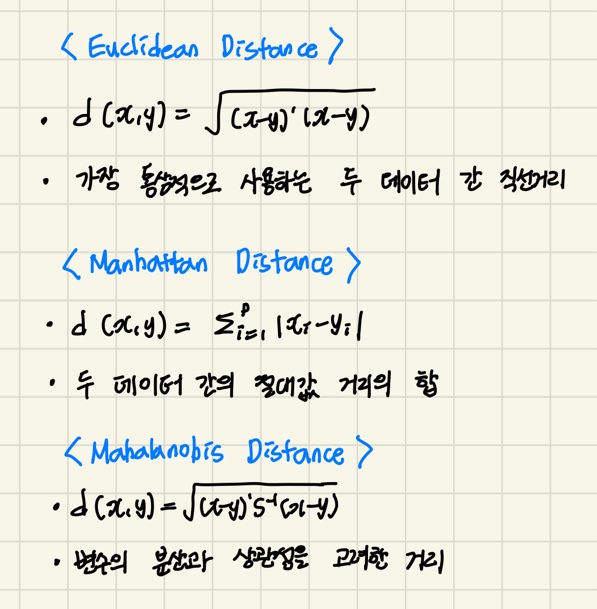

## 판별분석(LDA, QDA)

두 개 이상의 모집단에서 추출된 표본들의 정보를 통하여 이 표본들이 어느 모집단에서 추출된 것인지 결정하는 기준을 찾는 분석

#### 판별 변수 (Discriminant Variable)
* 어떤 집단에 속하는지 판별하기 위한 독립 변수 중 판별력이 높은 변수
* 판별 변수를 선택할 때, 판별 기여도 등 다양한 것을 고려하지만 상관관계가 적은 변수를 택하는 것이 효과적
* 예를 들어, 보험 가입 승인 여부 판별에 두 개의 변수를 사용한다면 나이, 연령대를 사용하는 것보다 나이, 가족력 여부를 사용하는 것이 두 변수 사이의 상관관계가 적다.

#### 판별 함수(Discriminant Function)
* 선택한 판별 변수들을 이용하여, 분류의 기준이 되는 판별 점수 도출하는 새로운 함수
* 판별 함수에 새로운 데이터를 대입하여, 해당 데이터가 어떤 집단에 속하는지 판별

#### 판별 점수 (Discriminant Score)
* 대상이 어떤 집단에 속하는지 판별하기 위해 그 대상의 판별 변수들의 값을 판별 함수에 대입하여 구한 값
* 𝑍=𝛽_0+𝛽_1 𝑋_1 〖+𝛽〗_2 𝑋_2+𝛽_3 𝑋_3+⋯+𝛽_𝑝 𝑋_𝑝

### 작동 단계
1. 케이스가 속한 집단을 구분하는 데 기여할 수 있는 독립 변수 찾기
2. 집단을 구분하는 기준이 되는 판별 함수 (선형결합/비선형결합) 도출
3. 판별 함수에 의해 (학습 데이터) 분류의 정확도 분석
4. 판별 함수를 이용하여 새로운 케이스 (테스트 데이터)가 속하는 클래스 예측

### LDA: 선형 판별 분석- 데이터의 각 클래스 집단이 정규분포의 형태를 가지고, 비슷한 형태의 공분산 구조를 가져야 함
##### 장점
* 변수 (x) 간 공분산 구조를 활용
* 공분산 구조 가정에 약간 위반되어도 비교적 robust하게 동작함

##### 단점
* 가장 작은 그룹의 샘플 수가 설명 변수의 개수보다 많아야 함
* 정규분포 가정에 크게 벗어나는 경우 잘 동작하지 못함
* 범주 (y) 사이에 공분산 구조가 많이 다른 경우 반영하지 못함 -> 이차 판별 분석(QDA)을 통해 해결 가능

### QDA: 이차 판별 분석- K(범주의 수)와 관계없이 Y의 범주별로 서로 다른 공분산 구조를 가진 경우에 활용 (어느 때든 QDA를 사용하는 것이 아닌, 공분산 구조가 다를 때만 사용)
##### 장점
* 서로 다른 공분산 데이터 분류 가능 (비선형 분류 가능)

##### 단점
* 샘플이 많이 필요함
* 독립 변수(설명 변수)의 개수가 많을 경우 추정해야 하는 모수가 많아짐 -> 연산량이 큼
